# Visualization: Let's use pictures to talk about things

In [2]:
import pandas as pd
#source: https://www.autodeskresearch.com/publications/samestats
data_url = "https://raw.githubusercontent.com/ccnypsych/psy31170/master/data/cairo_data.csv"
df = pd.read_csv(data_url, header=None)

In [4]:
df.head()

,0,1
0,55.3846,97.1795
1,51.5385,96.0256
2,46.1538,94.4872
3,42.8205,91.4103
4,40.7692,88.3333


In [5]:
df.describe()

,0,1
count,142.000000,142.000000
mean,54.263273,47.832253
std,16.765142,26.935403
min,22.307700,2.948700
25%,44.102600,25.288450
50%,53.333300,46.025600
75%,64.743600,68.525675
max,98.205100,99.487200


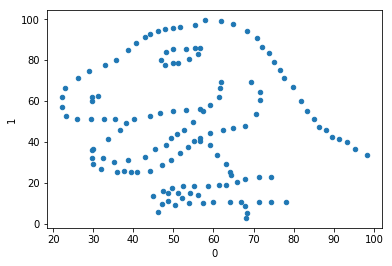

In [7]:
%matplotlib inline
_ = df.plot.scatter(x=0, y=1)

This idea of always plotting the data in addition to computing the summary statistics is traditionally exemplified using Anscomb's quartet, where in 4 datasets have the same mean and standard deviation, but look very different when plotted. You can read more about this at https://www.autodeskresearch.com/publications/samestats

![black and white picture of the titanic](figs/L11/RMS_Titanic_3.jpg)

I got my hands on this very cool Titanic dataset that provides me with a list of passengers and a bunch of information about them, like their names, ages, ticket fares and classes, where they got on, and how many siblings, parents, and children they came with. I’m really interested in trying to figure out if I can discern patterns in who survived and who didn’t– but first I have to sort out what sort of data I really have. Typically distinguishing data types is covered in a research methods course, but this slide will review these topics.

In [1]:
# I'm loading in the data set I'm using
import pandas as pd
dataurl = "https://raw.githubusercontent.com/story645/dhworkbooks/master/data/titanicfull.csv"
df = pd.read_csv(dataurl)

In [9]:
# printing the first 2 rows
df.head(2)

,pclass,survived,name,sex,age,sibsp,parch,ticket,fare,cabin,embarked,boat,body,home.dest
0,1,1,"Allen, Miss. Elisabeth Walton",female,29.00,0,0,24160,211.3375,B5,S,2,NaN,"St Louis, MO"
1,1,1,"Allison, Master. Hudson Trevor",male,0.92,1,2,113781,151.5500,C22 C26,S,11,NaN,"Montreal, PQ / Chesterville, ON"


![screenshot of spreadsheet where column labled as variable, row as observation, and cell as measurment](figs/L11/data_formatting.png)

* __Dataset__: collection of related information 
* __Variable__: attribute of the dataset 
* __Observation__: entry in the dataset 
* __Measurement__: single data point 

# What information  do these records hold?
| variable | measurement | 
|:------:|:-----------:|
|survival| Survival (0 = No; 1 = Yes)|
|pclass| Passenger Class (1 = 1st; 2 = 2nd; 3 = 3rd)|
|name | Name |
|sex | Sex |
|age | Age|
|sibsp| Number of Siblings/Spouses Aboard|
|parch| Number of Parents/Children Aboard|
|ticket| Ticket Number|
|fare| Passenger Fare|
|cabin| Cabin|
|embarked| Port of Embarkation (C = Cherbourg; Q = Queenstown; S = Southampton)|

# Types of Measurments:

* __Quantitative__: how much?
  + __Discrete__: countable values 
  + __Continuous__: any numerical variable with a  technically infinite number of increments
* __Qualitative__: what kind?
  + __Categorical__: qualitative data that can be sorted into groups
  + __Interviews, Observations, Documents__



While usually straightforward, categorical data sometimes can masquerade as a quantitative measurement. For example, survival and passenger class are coded numerically (0/1, and 1/2/3 respectively), but could just as easily be represented using words like yes/no and low/middle/high. If the numbers are just there because there are a set number of types of something, meaning that the order of the numbers is arbitrary — like survived and not survived or 3 passenger classes — then it’s categorical data. But if the number is intrinsic to the measurement — describing how many siblings a passenger has or the passenger’s age– then it’s a quantitative  measurement.

# Measurement Scales
* __Quantitative__:
  + __Interval__: difference between values means something quantifiable 
  + __Ratio__: interval data with a floor
* __Categorical__:
  + __Nominal__: names of categories that are mutually exclusive 
  + __Ordinal__: values with a natural ordering like best to worst 


Nominal categories being mutually exclusive doesn’t mean that categorical data is inherently independent. For example, imagine a map of neighborhoods categorized into safe, so-so, unsafe. It is highly likely that one neighborhood’s classification is dependent on its neighboring zipcode’s classifications.

# What are some guidelines for visualizing the measurements?

![table ordering bertins retinal variables](figs/L11/retinal_variables.png)

Bertin's retinal variables provide guidance on how to change aspects of a picture- markers, lines, areas - given the type of measurement being visualized. 

In [16]:
#let's see who died
df['survived'].value_counts()

0    809
1    500
Name: survived, dtype: int64

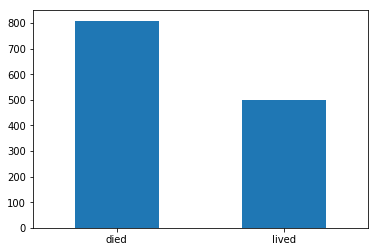

In [18]:
#lets see count , and label lived/died
import matplotlib.pyplot as plt
fig, ax = plt.subplots()
_ = df['survived'].value_counts().plot.bar()
_ = ax.set_xticklabels(["died", "lived"], rotation=0) 

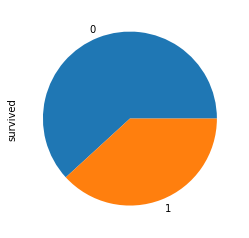

In [19]:
#ratio?
fig, ax = plt.subplots()
_ = df['survived'].value_counts().plot.pie(ax=ax)
ax.set_aspect('equal')


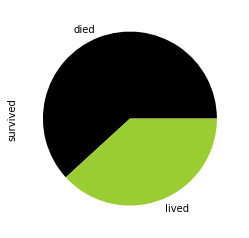

In [20]:
# What happens if we change the color?
_ = df['survived'].value_counts().plot.pie(colors=['black', 'yellowgreen'], labels=['died', 'lived'])

In [27]:
#pd.cut(df['fare'],10) 

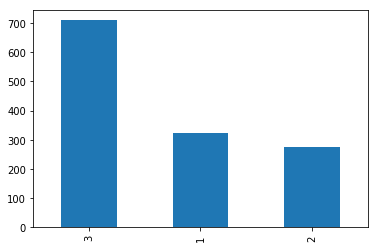

In [30]:
df['pclass'].value_counts().plot.bar()

# Practice: Pair up w/ partner
 
 1. choose a variable 
 2. one person should print a pie chart, the other a bar chart
 3. discuss with each other what the charts convey & post charts + observations to gitter

In [21]:
df.columns

Index(['pclass', 'survived', 'name', 'sex', 'age', 'sibsp', 'parch', 'ticket',
       'fare', 'cabin', 'embarked', 'boat', 'body', 'home.dest'],
      dtype='object')

In [35]:
#What if we want to start seeing sub groups, like who died?
#count gives us how many of each
df.groupby(['survived', 'pclass']).count()

name  sex  age  sibsp  parch  ticket  fare  cabin  embarked  \
survived pclass                                                                
0        1        123  123  103    123    123     123   123     89       123   
         2        158  158  146    158    158     158   158      6       158   
         3        528  528  370    528    528     528   527      7       528   
1        1        200  200  181    200    200     200   200    167       198   
         2        119  119  115    119    119     119   119     17       119   
         3        181  181  131    181    181     181   181      9       181   

                 boat  body  home.dest  
survived pclass                         
0        1          2    35        114  
         2          1    31        144  
         3          6    55        140  
1        1        199     0        175  
         2        111     0        117  
         3        167     0         55

In [37]:
#let's turn it into a table:
df.groupby(['survived', 'pclass'])['survived'].count().unstack()

pclass,1,2,3
survived,,,
0,123,158,528
1,200,119,181


In [44]:
df.groupby(['survived','sex']).count()

pclass  name  age  sibsp  parch  ticket  fare  cabin  \
survived sex                                                            
0        female     127   127   96    127    127     127   127      8   
         male       682   682  523    682    682     682   681     94   
1        female     339   339  292    339    339     339   339    133   
         male       161   161  135    161    161     161   161     60   

                 embarked  boat  body  home.dest  
survived sex                                      
0        female       127     1     8         47  
         male         682     8   113        351  
1        female       337   318     0        241  
         male         161   159     0        106

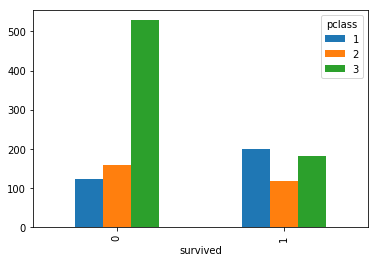

In [38]:
_ = df.groupby(['survived', 'pclass'])['survived'].count().unstack().plot.bar()

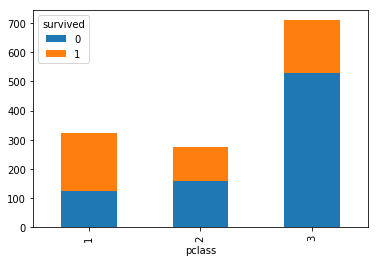

In [47]:
#lets move around so that i can get ratio of lived to died
_ = df.groupby(['pclass', 'survived'])['survived'].count().unstack().plot.bar(stacked=True)

In [57]:
demos = df.groupby(['pclass', 'survived'])['survived'].count().unstack()
demos.reset_index()

survived,pclass,0,1
0,1,123,200
1,2,158,119
2,3,528,181


In [50]:
pclass = demos.reset_index()['pclass']
heights = demos.values

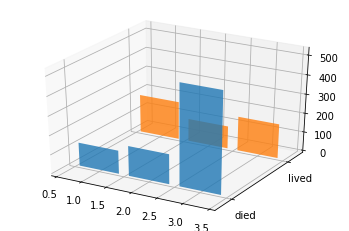

In [54]:
# but there are 3 dimensions, right?
from mpl_toolkits.mplot3d import Axes3D 
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')

for survived in [0,1]:
    # Plot the bar graph given by xs and ys on the plane y=k with 80% opacity.
    ax.bar(pclass, heights[:,survived], survived, zdir='y', alpha=0.8)
    
#only label valyes we have 
_ = ax.set_yticks([0,1])
_ = ax.set_yticklabels(['died','lived'])
_ = ax.set_ylim([-.25,1.25]) # move values around on plot around a bit 

# Practice: Pair up w/ partner
 
 1. choose a different variable/try a different cross tabulation
 2. Pick different ways to plot - stacked bar, grouped bar, 3d bar
 3. discuss with each other what the charts convey & post charts + observations to gitter

# What about non-categorical data?

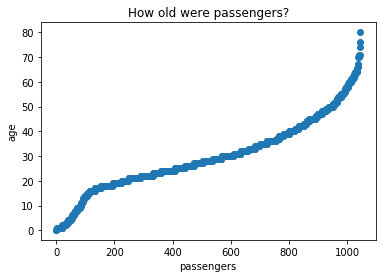

In [58]:
# plot age against passenger, scatter plot because passengers are discrete 
fig, ax = plt.subplots()
_ = ax.plot(df['age'].sort_values().values, 'o')
_ = ax.set_title("How old were passengers?")
_ = ax.set_xlabel("passengers")
_ = ax.set_ylabel("age")


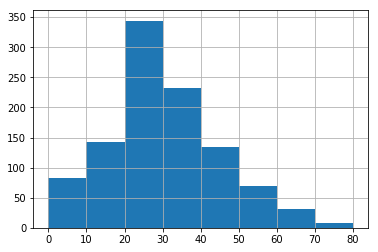

In [60]:
# let's look at the distrubutions of ages using hist
# passing in range(0,90,10) to cut up ages into increments of 10
_ = df['age'].hist(bins = range(0,90,10))

In [68]:
df.groupby('sex')['age'].describe()

,count,mean,std,min,25%,50%,75%,max
sex,,,,,,,,
female,388.0,28.687088,14.576962,0.17,19.0,27.0,38.0,76.0
male,658.0,30.585228,14.280581,0.33,21.0,28.0,39.0,80.0


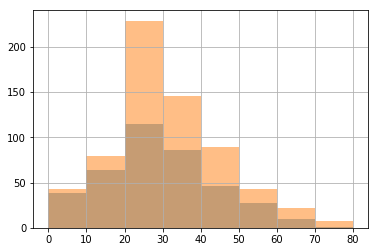

In [74]:
_ = df.groupby('sex')['age'].hist(alpha=.5, bins = range(0,90,10))

In [80]:
df.groupby('pclass')['age'].count()

pclass
1    284
2    261
3    501
Name: age, dtype: int64

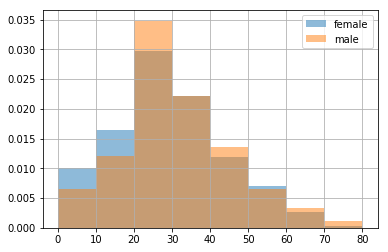

In [84]:
fig, ax = plt.subplots()
_ = df.groupby('sex')['age'].hist(alpha=.5, density=True, bins = range(0,90,10),ax=ax)
_ = ax.legend(['female', 'male']) # grouping is always alphabetically/numerically sorted

# try a different variable!

# How do we connect variables?

* __Independent__: These measurements don’t affect each other. 
* __Dependent__: These measurements do affect each other. (can be one way)

Although being able to categorize data as independent or dependent is often taken for granted, this distinction is crucial for any later analysis. This boils down to: given a set of data, are they related to each other in a way where one value affects the other?

__Independent__

These measurements don’t affect each other. For example, the age of one passenger has nothing to do with the age of a different passenger, and neither of those values affect the ages of the other passengers, so age is independent with respect to itself. Age is also independent of ticket number since there’s no relationship between a passenger’s age and their assigned ticket number.

__Dependent__

These measurements do affect each other. The passenger ids were assigned by whoever was encoding the data, but done so in an ordered fashion such that every passenger id is one more than the previous one. So the first id has a value of 1 and the second has a value of 2 and so every passenger id is one more than the previous; therefore passenger ids are dependent. It is the only dependent variable in the dataset, but there are still dependent relationships between the variables. For example, passenger class is somewhat related to fare.

A less arbitrary and more common example of dependent datasets are time dependent recordings like temperature; today’s temperature is influenced by yesterday’s temperature and will influence tomorrow’s temperature.

# Independent Variables

In [ ]:
# there's no apparent pattern between age and fare
fig, ax = plt.subplots()
_ = df.plot.scatter('age', 'fare', ax=ax)
fig.savefig("figs/graphs/indep.png")

# Dependent Variables

We use the [seaborn](https://seaborn.pydata.org/) data visualization library to make statistical visualizations. Here we use stripplots, which are scatter plots used to visualize categorical data jitter is used to spread overlapping data out fare seems to be dependent on class only for the first class case

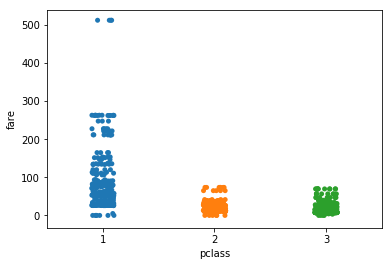

In [87]:
import seaborn as sns
fig, ax = plt.subplots()
_ = sns.stripplot(x='pclass', y='fare', data = df, jitter=True)

# Can we tell? Is there an underlying 3rd variable? 

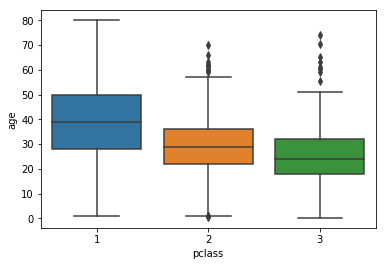

In [90]:
import seaborn as sns
fig, ax = plt.subplots()
_ = sns.boxplot('pclass', 'age', data=df, ax=ax)

In [ ]:
_ = df.groupby('pclass')['sex'].hist()

# Pair up
Discuss with your partner a list of possible variables on which survival could depend on. Explore whether this relationship is supported by the data using visualizations. 

Hint: Does the correlation between variables give you a starting point?

In [2]:
df.corr()


,pclass,survived,age,sibsp,parch,fare,body
pclass,1.000000,-0.312469,-0.408106,0.060832,0.018322,-0.558629,-0.034642
survived,-0.312469,1.000000,-0.055512,-0.027825,0.082660,0.244265,NaN
age,-0.408106,-0.055512,1.000000,-0.243699,-0.150917,0.178740,0.058809
sibsp,0.060832,-0.027825,-0.243699,1.000000,0.373587,0.160238,-0.099961
parch,0.018322,0.082660,-0.150917,0.373587,1.000000,0.221539,0.051099
fare,-0.558629,0.244265,0.178740,0.160238,0.221539,1.000000,-0.043110
body,-0.034642,NaN,0.058809,-0.099961,0.051099,-0.043110,1.000000


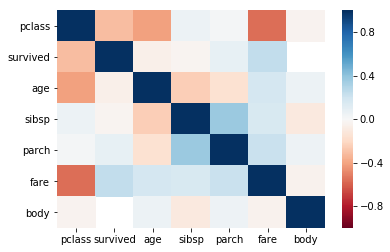

In [4]:
%matplotlib inline
import seaborn as sns
# vmin and vmax are the smallest & largest values respectively 
# correlation always ranges -1 to 1
_ = sns.heatmap(df.corr(), vmin=-1, vmax=1, cmap='RdBu')

# How do we give context to the things we're visualizing?

In [ ]:
# count of passengers at each port
df['embarked'].value_counts()

In [ ]:
_ = df['embarked'].value_counts().plot.bar()

These are port cities, which means they have a physical geographic location attached to them. We can take these counts and plot them as markers of the location, and then adjust the size relative to the count-which is called a bubble chart. 

In [ ]:
# lat, lon, count
cities = {'Cherbourg':(49.6337, 1.6221, 6), 
          'Queenstown': (51.8503, 360-8.2943, 3),
          'Southampton': (50.9097, 1.2024, 24)}

In [ ]:
# plot embarkement points on map
import matplotlib.pyplot as plt
import cartopy.crs as ccrs
import cartopy.feature as cfeature

fig = plt.figure(figsize=(20, 10))
ax = fig.add_subplot(1, 1, 1, projection=ccrs.Robinson())
ax.set_extent([-15, 15, 40, 60])
for key, (lat, lon, count) in cities.items():
    # bubble plot: size points relative to count of people at embarkments
    ax.plot(lon, lat, 'o', markersize=count, markeredgecolor='k', 
            transform=ccrs.PlateCarree(), label=key)
ax.legend(ncol=3)
ax.add_feature(cfeature.BORDERS)
ax.add_feature(cfeature.LAND)
ax.add_feature(cfeature.COASTLINE)
ax.add_feature(cfeature.OCEAN)
plt.show()
fig.savefig("figs/graphs/catmap.png")


Word clouds are typically used to show distributions of words. The size of the word in the image is proportional to the frequency with which it occurs in the dataset. 

In [ ]:
from wordcloud import WordCloud, STOPWORDS

stopwords = set(STOPWORDS)
wc = WordCloud(background_color="white", max_words=2000, stopwords=stopwords)
wordcloud = wc.generate(" ".join(df['name'].values))

plt.figure(figsize=(20,10))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.savefig("figs/graphs/qualnames.png")